In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("C:/Users/gaonk/OneDrive/Desktop/ML/MLPractice/ML Dataset/ML Dataset/diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[features_cols]
Y = data['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Training Accuracy:  1.0
Testing Accuracy:  70.56277056277057 %


In [6]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)

print("Cross-Value Score: ", cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = clf1.predict(x_test)
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Cross-Value Score:  0.6776380153738644
Testing Accuracy:  72.72727272727273 %


[Text(0.4441105769230769, 0.9642857142857143, 'x[1] <= 127.5\ngini = 0.459\nsamples = 537\nvalue = [345, 192]'),
 Text(0.2132554945054945, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.326\nsamples = 336\nvalue = [267, 69]'),
 Text(0.09065934065934066, 0.8214285714285714, 'x[5] <= 49.1\ngini = 0.149\nsamples = 185\nvalue = [170, 15]'),
 Text(0.07967032967032966, 0.75, 'x[0] <= 7.5\ngini = 0.132\nsamples = 183\nvalue = [170, 13]'),
 Text(0.06868131868131869, 0.6785714285714286, 'x[5] <= 30.95\ngini = 0.123\nsamples = 182\nvalue = [170, 12]'),
 Text(0.02197802197802198, 0.6071428571428571, 'x[6] <= 0.672\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(0.01098901098901099, 0.5357142857142857, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.03296703296703297, 0.5357142857142857, 'x[6] <= 0.686\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.02197802197802198, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04395604395604396, 0.4642857142857143, '

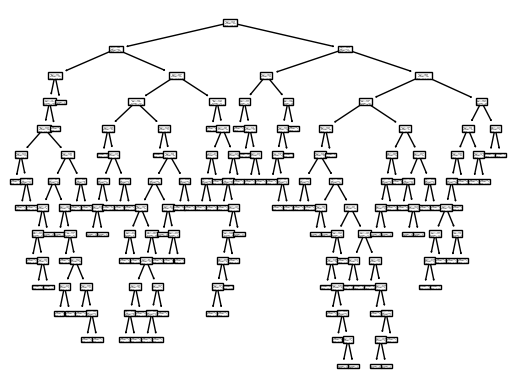

In [7]:
tree.plot_tree(clf)